In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [2]:
base_dir = os.getcwd()
exec_dir = '..'

In [3]:
sizes = [1000, 2500, 5000, 7500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
print(sizes)

[1000, 2500, 5000, 7500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


In [5]:
capacities = [100*i for i in range(1, 10+1)] + [2000, 5000]
print(capacities)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000]


In [4]:
# Create slices of the original data set.
df = pd.read_csv('{}/data/crash_data.csv'.format(base_dir))
# Shuffle the rows of the original data set.
df = df.sample(frac=1).reset_index(drop=True)
for s in sizes:
    part = df.head(s)
    part.to_csv('{}/test_construction/crash_data_{}.csv'.format(base_dir, s), index=False)

# Construction test 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.

In [15]:
# Test the implementation.

capacity = 100
ntrials = 20
output_file1 = '{}/test_construction/test_construction.csv'.format(base_dir)

f = open(output_file1, 'w')

os.chdir(exec_dir)

for m in sizes:
    if (m == 0): 
        continue
    print('Testing m={}...'.format(m))
    input_file = "{}/test_construction/crash_data_{}.csv".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

print('Done!')

Testing m=1000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_1000.csv
884.65
Testing m=2500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_2500.csv
1942.45
Testing m=5000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_5000.csv
3801.9
Testing m=7500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_7500.csv
6088.35
Testing m=10000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7832.3
Testing m=20000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_20000.csv
15578.9
Testing m=30000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_30000.csv
23072.35
Testing m=40000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_40000.csv
31679.5
Testing m=50000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
40182.6
Testing m=60000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_60000.cs

In [16]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file1, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,1000,0.885
1,2500,1.942
2,5000,3.802
3,7500,6.088
4,10000,7.832
5,20000,15.579
6,30000,23.072
7,40000,31.680
8,50000,40.183
9,60000,48.047


In [17]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
     m &   time \\
\midrule
  1000 &  0.885 \\
  2500 &  1.942 \\
  5000 &  3.802 \\
  7500 &  6.088 \\
 10000 &  7.832 \\
 20000 & 15.579 \\
 30000 & 23.072 \\
 40000 & 31.680 \\
 50000 & 40.183 \\
 60000 & 48.047 \\
 70000 & 55.738 \\
 80000 & 63.250 \\
 90000 & 71.599 \\
100000 & 81.773 \\
\bottomrule
\end{tabular}



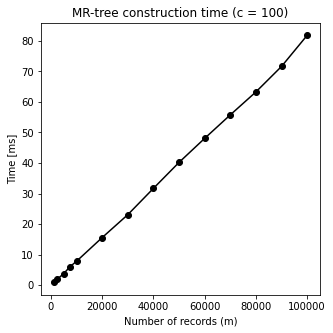

In [18]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree construction time (c = 100)")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test-construction.eps".format(base_dir), format='eps', bbox_inches='tight')

# Construction test 2

We fix the number of records $m$ and change the capacity $c$.

In [22]:
m = 10000
ntrials = 20
output_file2 = '{}/test_construction/test_construction_capacity.csv'.format(base_dir)

In [23]:
# Test the implementation.

f = open(output_file2, 'w')

os.chdir(exec_dir)

for c in capacities:
    print('Testing c={}...'.format(c))
    input_file = '{}/test_construction/crash_data_{}.csv'.format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(['./TestIndex', input_file, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(c, avg))

f.close()

os.chdir(base_dir)
print('Done!')

Testing c=100...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7623.95
Testing c=200...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7409.7
Testing c=300...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8073.9
Testing c=400...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8087.55
Testing c=500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8113.95
Testing c=600...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8025.7
Testing c=700...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7988.05
Testing c=800...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7788.0
Testing c=900...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7918.45
Testing c=1000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7836.95
Tes

In [24]:
# Print the results.
pd.set_option("display.precision", 3)
df2 = pd.read_csv(output_file2, header=None)
columns = ['c', 'time']
df2.columns = columns
df2.sort_values(ascending=True, by='c', inplace=True)
df2['time'] /= 1000
df2

,c,time
0,100,7.624
1,200,7.410
2,300,8.074
3,400,8.088
4,500,8.114
5,600,8.026
6,700,7.988
7,800,7.788
8,900,7.918
9,1000,7.837


In [25]:
print(df2.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
   c &  time \\
\midrule
 100 & 7.624 \\
 200 & 7.410 \\
 300 & 8.074 \\
 400 & 8.088 \\
 500 & 8.114 \\
 600 & 8.026 \\
 700 & 7.988 \\
 800 & 7.788 \\
 900 & 7.918 \\
1000 & 7.837 \\
2000 & 7.727 \\
5000 & 7.713 \\
\bottomrule
\end{tabular}



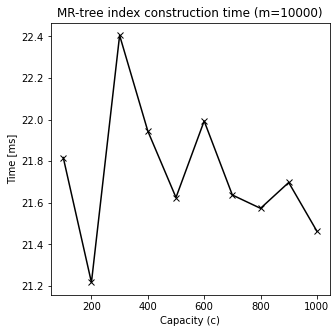

In [13]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree index construction time (m={})".format(m))
plt.plot(df2['c'], df2['time'], marker='x', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Capacity (c)")
plt.savefig("{}/test_construction/test-construction-capacity.eps".format(base_dir), format='eps', bbox_inches='tight')